# Import the `auto-mpg dataset`
- Download the `auto-mpg dataset`

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
# convert to dataframe object df
df = pd.read_csv('auto-mpg.csv')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,CAR Number
0,18,8,307.0,130,3504,12.0,70.0,1,chevrolet chevelle malibu,L6V 043
1,15,8,350.0,165,3693,11.5,70.0,1,buick skylark 320,RTY079
2,18,8,318.0,150,3436,11.0,70.0,1,plymouth satellite,MTP600
3,16,8,304.0,150,3433,12.0,70.0,1,amc rebel sst,MNJ000
4,17,8,302.0,140,3449,10.5,70.0,1,ford torino,JEETMEET


# Drop column `Origin` from the dataset
```python
DataFrame.drop(labels=None, *, axis=0, index=None, columns=None, level=None, inplace=False, errors='raise')
```
## axis {0 or ‘index’, 1 or ‘columns’}, default 0
- Whether to drop labels from the index (0 or ‘index’) or columns (1 or ‘columns’).
### Reference
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html

In [38]:
df = df.drop('origin',axis=1)
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name,CAR Number
0,18,8,307.0,130,3504,12.0,70.0,chevrolet chevelle malibu,L6V 043
1,15,8,350.0,165,3693,11.5,70.0,buick skylark 320,RTY079
2,18,8,318.0,150,3436,11.0,70.0,plymouth satellite,MTP600
3,16,8,304.0,150,3433,12.0,70.0,amc rebel sst,MNJ000
4,17,8,302.0,140,3449,10.5,70.0,ford torino,JEETMEET


# Check data type whether it's appropriate and then transform data

In [39]:
# check datatypes
# df.info()

# noted datatypes for model year is float64 and change it to int64 because year doesn't have decimal
df['model year'] = df['model year'].astype('int',errors='ignore')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           98 non-null     int64  
 1   cylinders     98 non-null     int64  
 2   displacement  98 non-null     float64
 3   horsepower    98 non-null     int64  
 4   weight        98 non-null     int64  
 5   acceleration  96 non-null     float64
 6   model year    96 non-null     float64
 7   car name      98 non-null     object 
 8   CAR Number    91 non-null     object 
dtypes: float64(3), int64(4), object(2)
memory usage: 7.0+ KB


# Find out all the missing values in the dataset and replace it with its most appropriate replacement. 
Finding out missing values: We can use `.sum()` method after applying `.isnull()` this will return sum of missing values within each columns in the dataframe
Note: `isna()` is the updated function
```python
import pandas as pd
df = pd.read_csv('IMDB-Movie-Data.csv')
df.isnull().sum()
```

In [40]:
# find the sum value of null found in the dataset
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    2
model year      2
car name        0
CAR Number      7
dtype: int64

# remove null values and replace with most appropriate replacement
- References: https://sparkbyexamples.com/pandas/pandas-get-column-average-mean/
- References: https://www.tutorialspoint.com/how-to-display-most-frequent-value-in-a-pandas-series
- Since car number are unique ID therefore I will leave it as is

In [41]:
# Mean value for each column for acceleration
mean_acceleration = round(df['acceleration'].mean(),1)

# Use mode for the highest frequency the year the car was made
mode_year = df['model year'].mode()[0]

# Fillna() on multiple columns with different values
df =  df.fillna(value={'acceleration':mean_acceleration,'model year':mode_year})
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
car name        0
CAR Number      7
dtype: int64

# Find and remove duplicate entries for the column `CAR Number`

In [42]:
# Find the duplicated row
df[df.duplicated()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name,CAR Number
17,15,8,383.0,170,3563,10.0,70.0,dodge challenger se,TN5678


In [43]:
# drop duplicated
df = df.drop_duplicates()

In [44]:
df[df.duplicated()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name,CAR Number


# Get the basic insights:
- Display the first five and last five rows
- Display all the column names in the dataset
- Display the concise summary of your dataset
- Display the name of the car with maximum number of horsepower

In [45]:
print('First five rows: \n')
df.head()

First five rows: 



,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name,CAR Number
0,18,8,307.0,130,3504,12.0,70.0,chevrolet chevelle malibu,L6V 043
1,15,8,350.0,165,3693,11.5,70.0,buick skylark 320,RTY079
2,18,8,318.0,150,3436,11.0,70.0,plymouth satellite,MTP600
3,16,8,304.0,150,3433,12.0,70.0,amc rebel sst,MNJ000
4,17,8,302.0,140,3449,10.5,70.0,ford torino,JEETMEET


In [46]:
print('Last five rows: \n')
df.tail()

Last five rows: 



,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name,CAR Number
93,14,8,318.0,150,4237,14.5,73.0,plymouth fury gran sedan,FGTEE4
94,13,8,440.0,215,4735,11.0,73.0,chrysler new yorker brougham,GTTYR6
95,12,8,455.0,225,4951,11.0,73.0,buick electra 225 custom,TTGGT53
96,13,8,360.0,175,3821,11.0,73.0,amc ambassador brougham,TGTYY67
97,18,6,225.0,105,3121,16.5,73.0,plymouth valiant,HUYT76


In [47]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'car name', 'CAR Number'],
      dtype='object')

In [48]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
count,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000
mean,18.432990,6.298969,253.097938,130.618557,3339.948454,14.087629,71.247423
std,5.892982,1.871747,124.744586,47.868623,978.185516,2.978229,1.041142
min,9.000000,3.000000,70.000000,46.000000,1613.000000,8.000000,70.000000
25%,14.000000,4.000000,120.000000,90.000000,2372.000000,12.000000,70.000000
50%,17.000000,8.000000,302.000000,130.000000,3436.000000,14.000000,71.000000
75%,23.000000,8.000000,350.000000,165.000000,4237.000000,15.500000,72.000000
max,35.000000,8.000000,455.000000,225.000000,5140.000000,23.500000,73.000000


In [49]:
# Display the name of the car with maximum number of horsepower
df.iloc[df['horsepower'].idxmax()]['car name']

'pontiac catalina'

## In our dataset, the fuel consumption column is `mpg` and is represented by mpg (miles per gallon) unit. 
- Assume we are developing an application in a country that accepts fuel consumption with the `L/100km` standard. change the name of the column to `L/100km`
- Given: l/100km = 235.214583 / mpg

In [50]:
df['L/100km'] = df['mpg'].apply(lambda x: 235.214583/x)
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name,CAR Number,L/100km
0,18,8,307.0,130,3504,12.0,70.0,chevrolet chevelle malibu,L6V 043,13.067477
1,15,8,350.0,165,3693,11.5,70.0,buick skylark 320,RTY079,15.680972
2,18,8,318.0,150,3436,11.0,70.0,plymouth satellite,MTP600,13.067477
3,16,8,304.0,150,3433,12.0,70.0,amc rebel sst,MNJ000,14.700911
4,17,8,302.0,140,3449,10.5,70.0,ford torino,JEETMEET,13.836152
...,...,...,...,...,...,...,...,...,...,...
93,14,8,318.0,150,4237,14.5,73.0,plymouth fury gran sedan,FGTEE4,16.801042
94,13,8,440.0,215,4735,11.0,73.0,chrysler new yorker brougham,GTTYR6,18.093429
95,12,8,455.0,225,4951,11.0,73.0,buick electra 225 custom,TTGGT53,19.601215
96,13,8,360.0,175,3821,11.0,73.0,amc ambassador brougham,TGTYY67,18.093429


# Normalize the column `Weight` so that the values range from 0 to 1
- Given that: `x normalized = (x – x minimum) / (x maximum – x minimum)`
- https://www.wallstreetmojo.com/normalization-formula/

In [51]:
min_weight = df['weight'].min()
max_weight = df['weight'].max()
print(min_weight)
print(max_weight)
df['normalized_weight'] = df['weight'].apply(lambda x: (x-min_weight)/(max_weight-min_weight))
df

1613
5140


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name,CAR Number,L/100km,normalized_weight
0,18,8,307.0,130,3504,12.0,70.0,chevrolet chevelle malibu,L6V 043,13.067477,0.536150
1,15,8,350.0,165,3693,11.5,70.0,buick skylark 320,RTY079,15.680972,0.589736
2,18,8,318.0,150,3436,11.0,70.0,plymouth satellite,MTP600,13.067477,0.516870
3,16,8,304.0,150,3433,12.0,70.0,amc rebel sst,MNJ000,14.700911,0.516019
4,17,8,302.0,140,3449,10.5,70.0,ford torino,JEETMEET,13.836152,0.520556
...,...,...,...,...,...,...,...,...,...,...,...
93,14,8,318.0,150,4237,14.5,73.0,plymouth fury gran sedan,FGTEE4,16.801042,0.743975
94,13,8,440.0,215,4735,11.0,73.0,chrysler new yorker brougham,GTTYR6,18.093429,0.885172
95,12,8,455.0,225,4951,11.0,73.0,buick electra 225 custom,TTGGT53,19.601215,0.946413
96,13,8,360.0,175,3821,11.0,73.0,amc ambassador brougham,TGTYY67,18.093429,0.626028


# Using bins
- In our dataset, `horsepower` is a real valued variable ranging from 48 to 288, it has 57 unique values. What if we only care about the price difference between cars with `high horsepower`, `medium horsepower`, and `little horsepower` (3 types)? Can we rearrange them into three `bins` to simplify analysis. We will use the Pandas method `cut` to segment the `horsepower` column into 3 bins
- Reference: https://pandas.pydata.org/docs/reference/api/pandas.cut.html

In [52]:
df['horse_bins'] = pd.cut(df['horsepower'],3,labels=['little horsepower','medium horsepower','high horsepower'])
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name,CAR Number,L/100km,normalized_weight,horse_bins
0,18,8,307.0,130,3504,12.0,70.0,chevrolet chevelle malibu,L6V 043,13.067477,0.536150,medium horsepower
1,15,8,350.0,165,3693,11.5,70.0,buick skylark 320,RTY079,15.680972,0.589736,medium horsepower
2,18,8,318.0,150,3436,11.0,70.0,plymouth satellite,MTP600,13.067477,0.516870,medium horsepower
3,16,8,304.0,150,3433,12.0,70.0,amc rebel sst,MNJ000,14.700911,0.516019,medium horsepower
4,17,8,302.0,140,3449,10.5,70.0,ford torino,JEETMEET,13.836152,0.520556,medium horsepower
...,...,...,...,...,...,...,...,...,...,...,...,...
93,14,8,318.0,150,4237,14.5,73.0,plymouth fury gran sedan,FGTEE4,16.801042,0.743975,medium horsepower
94,13,8,440.0,215,4735,11.0,73.0,chrysler new yorker brougham,GTTYR6,18.093429,0.885172,high horsepower
95,12,8,455.0,225,4951,11.0,73.0,buick electra 225 custom,TTGGT53,19.601215,0.946413,high horsepower
96,13,8,360.0,175,3821,11.0,73.0,amc ambassador brougham,TGTYY67,18.093429,0.626028,high horsepower


# Use a histogram to visualize the distribution of bins we created above.
- References: https://matplotlib.org/stable/gallery/statistics/hist.html#histograms

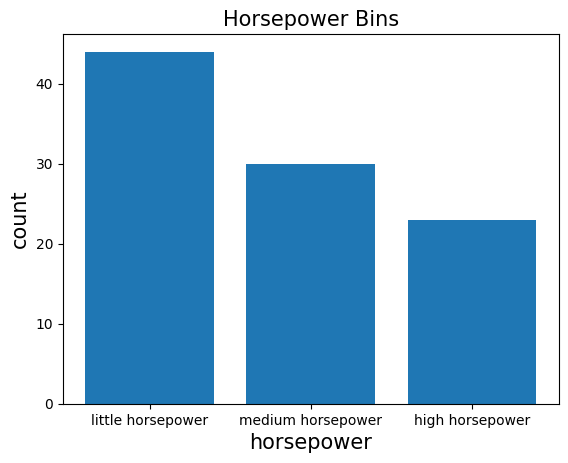

In [54]:
#plot the bar
plt.bar(["little horsepower","medium horsepower","high horsepower"],df["horse_bins"].value_counts())
plt.xlabel("horsepower",fontsize=15)
plt.ylabel("count",fontsize=15)
plt.title("Horsepower Bins",fontsize=15)
plt.show()